In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Set the figure size
plt.rcParams["figure.figsize"] = [15.50, 4.50]
plt.rcParams["figure.autolayout"] = True

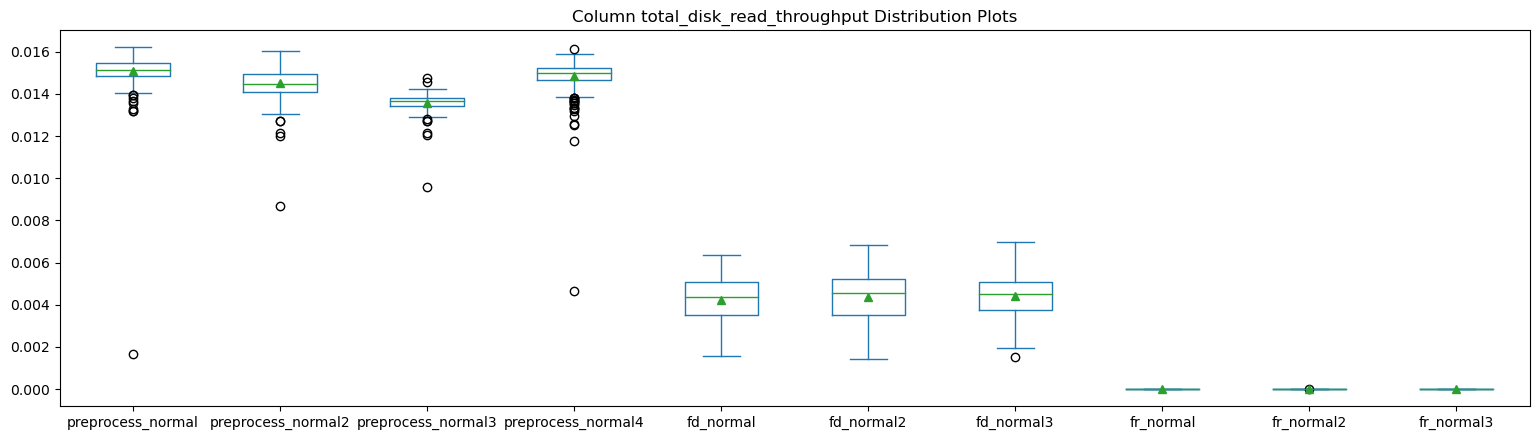

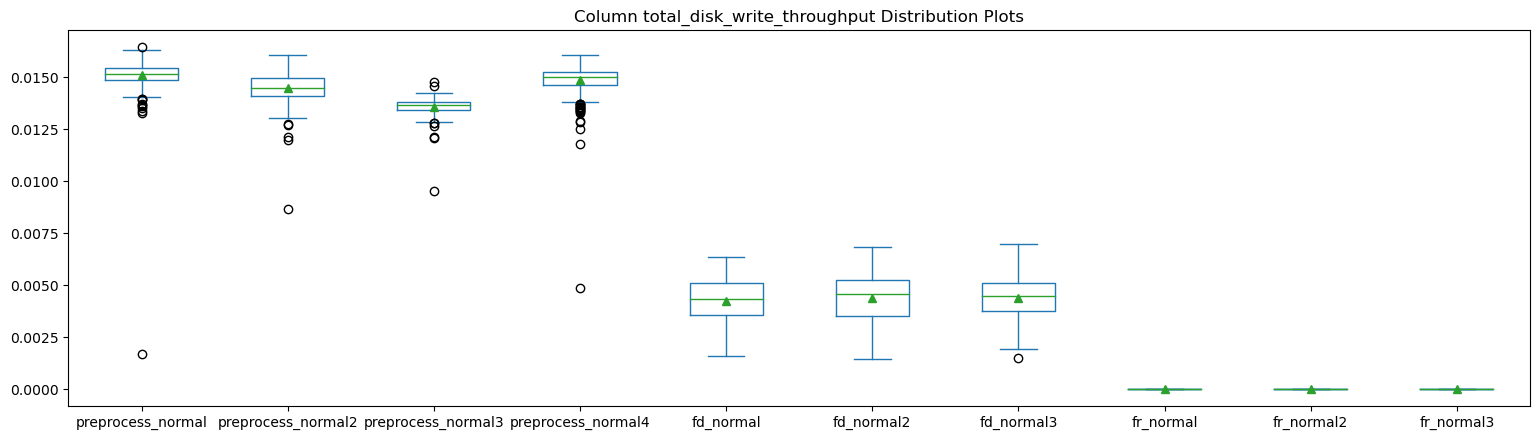

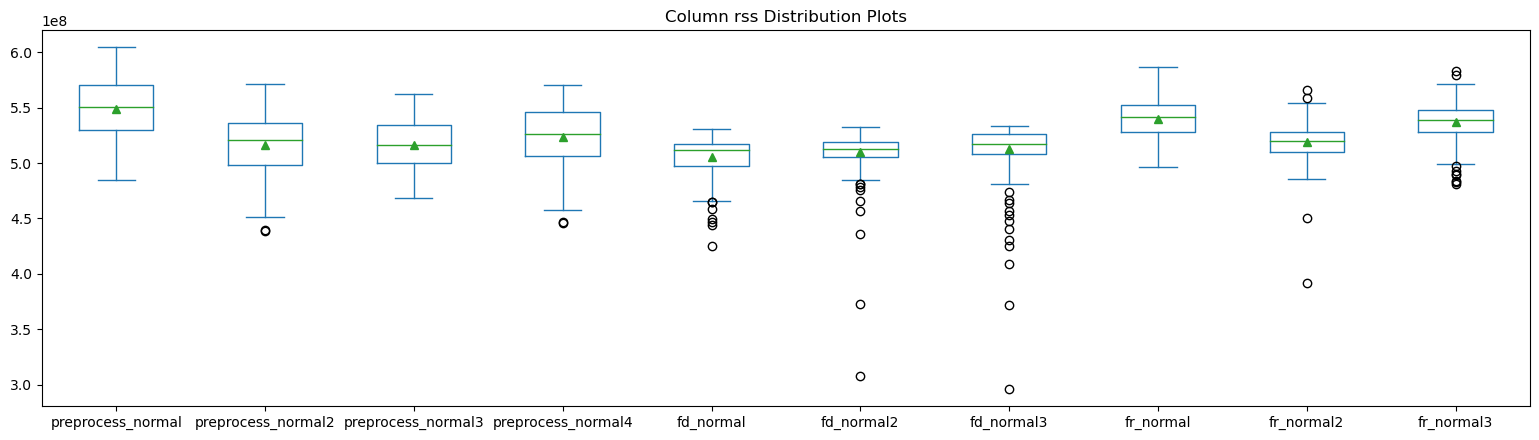

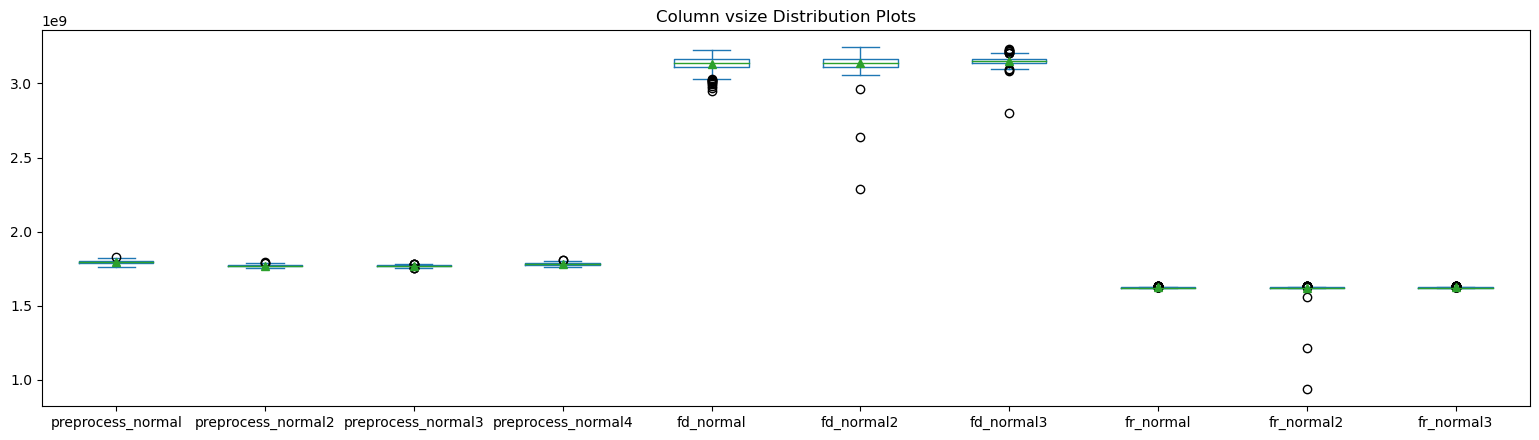

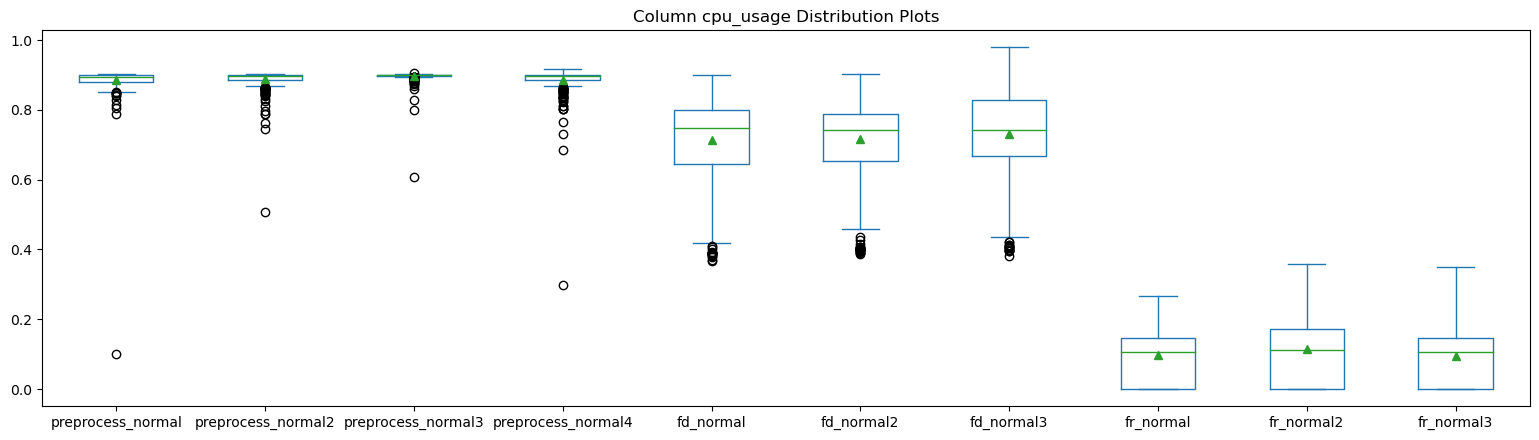

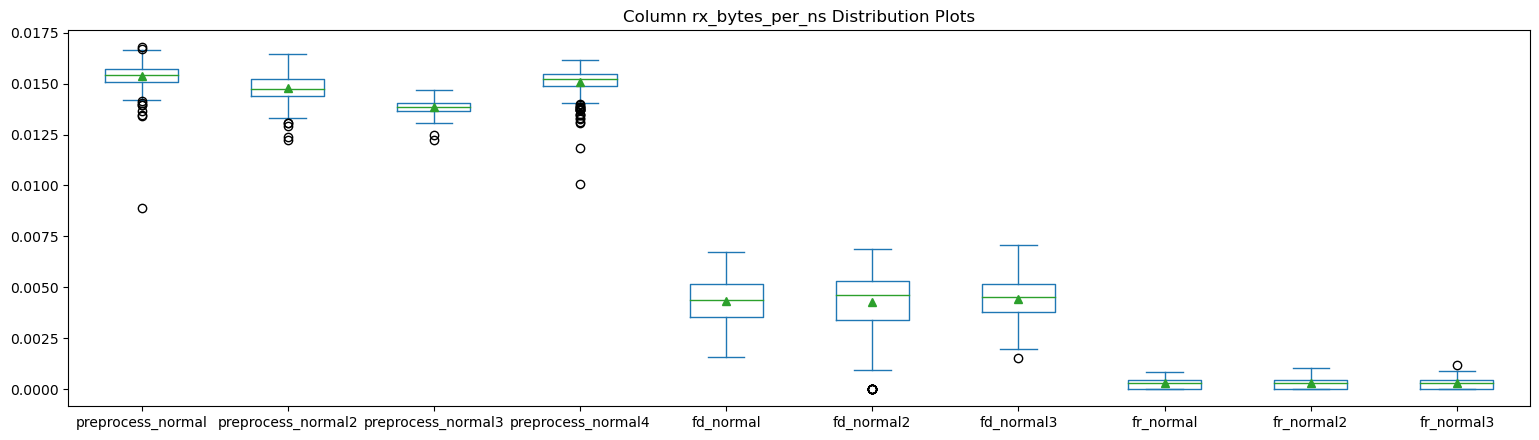

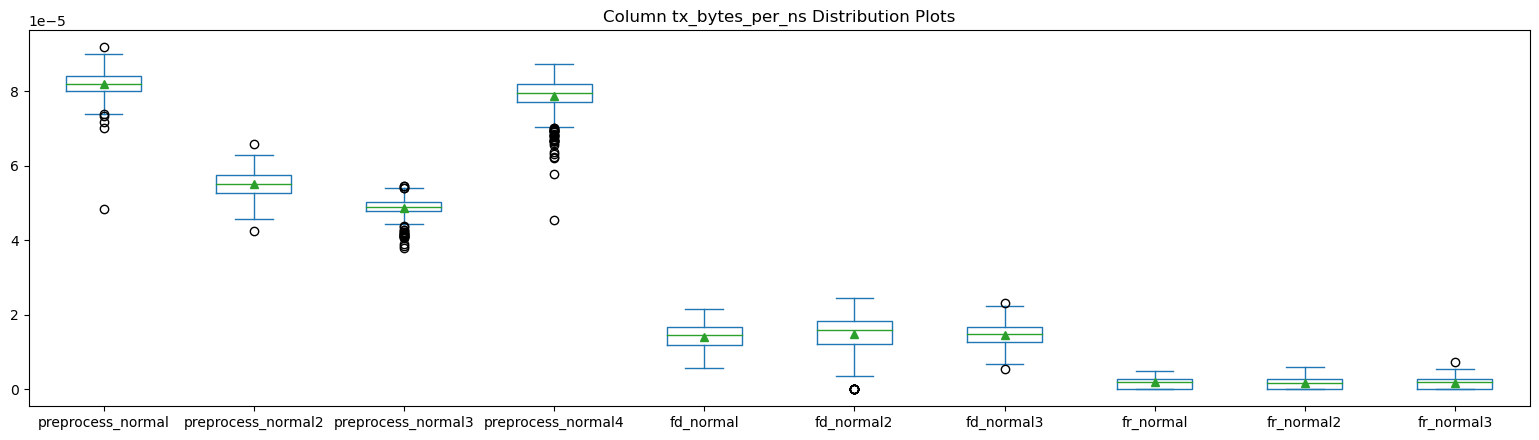

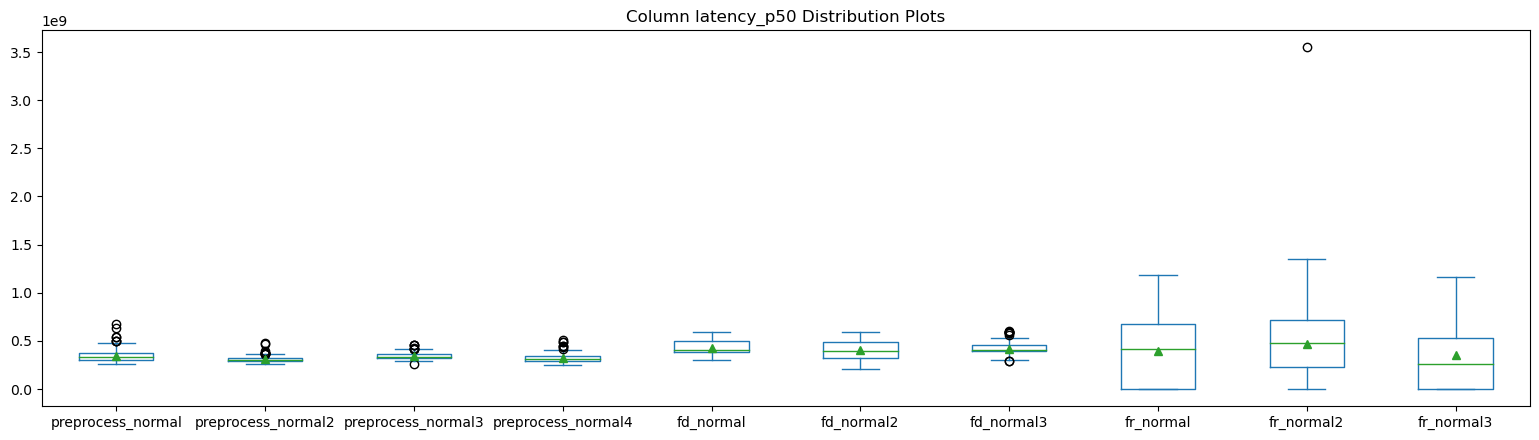

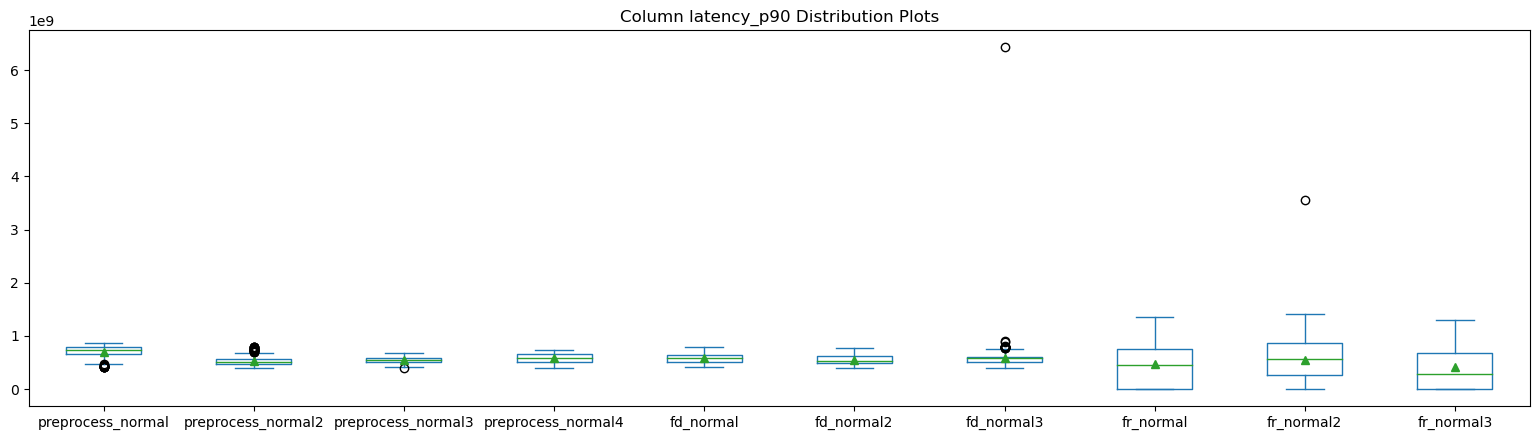

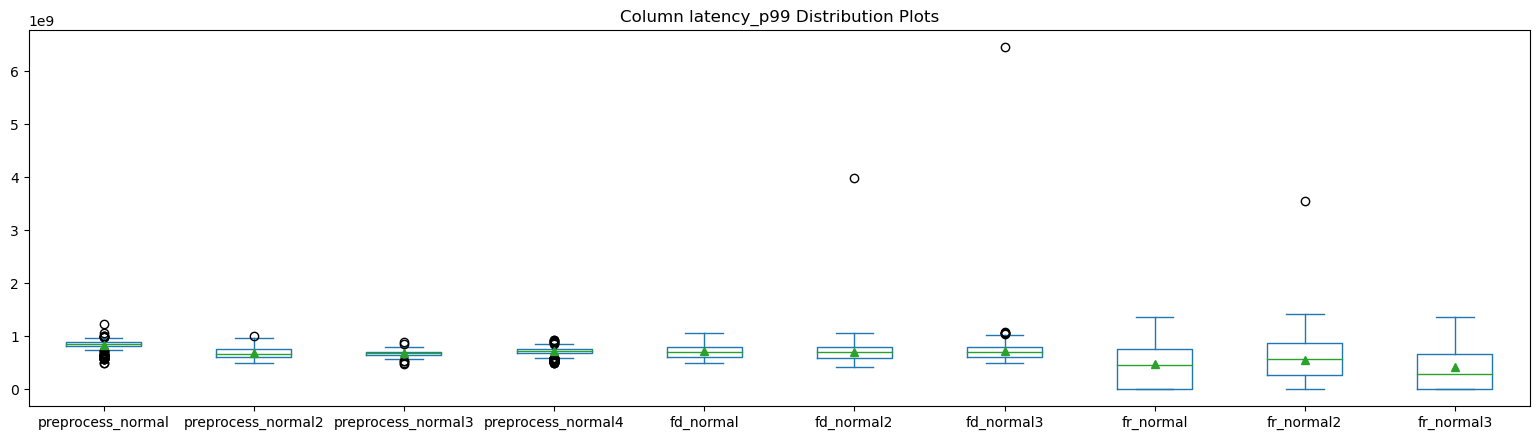

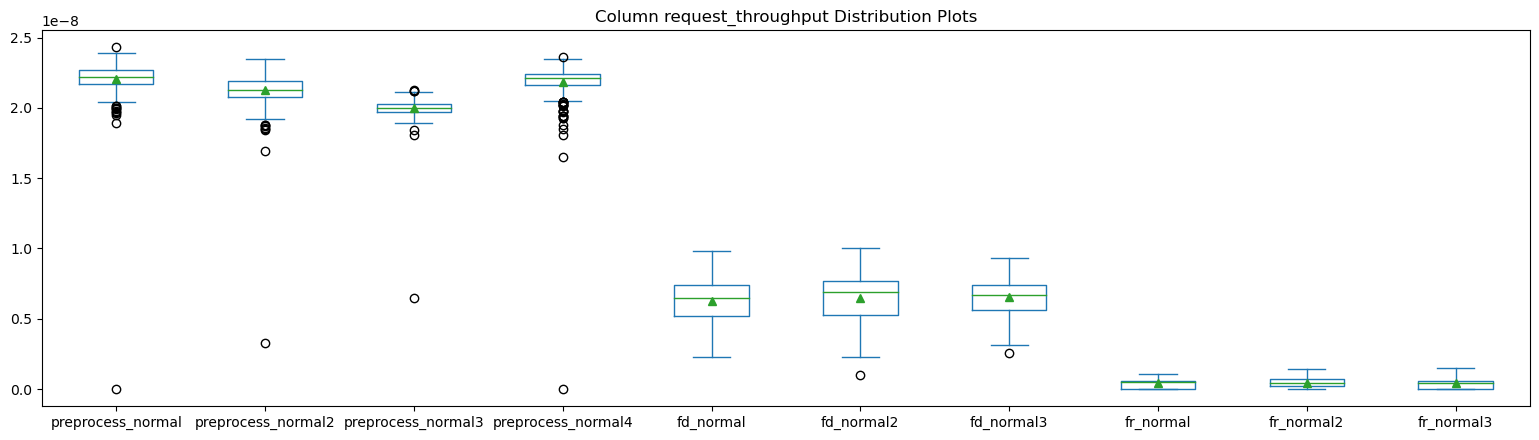

In [5]:
# Machines across columns
num_cols=11
col_id_to_name_mapping = ['total_disk_read_throughput','total_disk_write_throughput','rss','vsize','cpu_usage','rx_bytes_per_ns','tx_bytes_per_ns','latency_p50','latency_p90','latency_p99','request_throughput','errors_per_ns']
# fig, axs = plt.subplots(num_cols)

for i in range(num_cols):
    column_i_df = pd.read_csv('initial_eda/col_wise_dfs/column_'+col_id_to_name_mapping[i]+'.csv')
    axs[i] = column_i_df[['preprocess_normal', 'preprocess_normal2', 'preprocess_normal3', 'preprocess_normal4', 'fd_normal', 'fd_normal2', 'fd_normal3', 'fr_normal', 'fr_normal2', 'fr_normal3']].plot(kind='box', title='Column ' +col_id_to_name_mapping[i]+ ' Distribution Plots', showmeans=True) #, showfliers=False)

{'latency_p50': 0.011827281571261266, 'rss': 0.02238993347353751, 'latency_p99': 0.025507503642699336, 'latency_p90': 0.029701684744477052, 'tx_bytes_per_ns': 0.033394681805762536, 'rx_bytes_per_ns': 0.03751491150736451, 'total_disk_write_throughput': 0.05066561665301718, 'request_throughput': 0.05982172236385545, 'vsize': 0.06303557460904288, 'cpu_usage': 0.07383716763962685, 'total_disk_read_throughput': 0.12404088738991832}


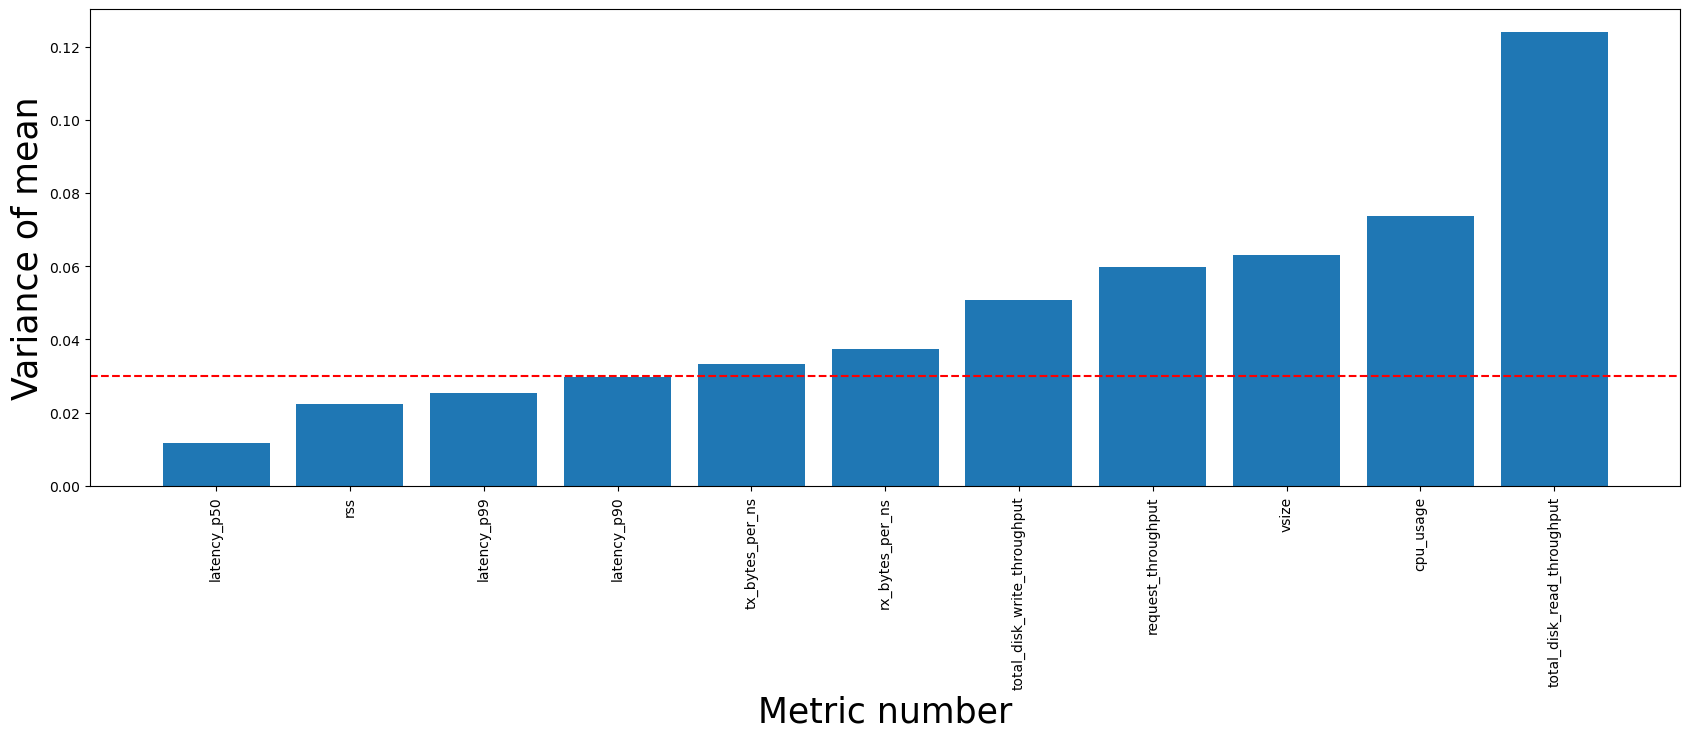

In [6]:
# Machines across columns
num_cols=11
machines_list=['preprocess_normal', 'preprocess_normal2', 'preprocess_normal3','preprocess_normal4', 'fd_normal', 'fd_normal2', 'fd_normal3', 'fr_normal', 'fr_normal2', 'fr_normal3']
machine_var_dict = {'total_disk_read_throughput':None,'total_disk_write_throughput':None,'rss':None,'vsize':None,'cpu_usage':None,'rx_bytes_per_ns':None,'tx_bytes_per_ns':None,'latency_p50':None, 'latency_p90':None, 'latency_p99':None, 'request_throughput':None}
for i in range(num_cols):
    column_i_df = pd.read_csv('standardized_data/standardized_col_wise_dfs/column_'+col_id_to_name_mapping[i]+'.csv')
    machine_mean_list = []
    for machine in machines_list:
        # Obtain mean of column
        machine_mean_list.append(column_i_df[machine].mean())
    machine_var_dict[col_id_to_name_mapping[i]] = np.var(machine_mean_list)

sorted_machine_var_dict = dict(sorted(machine_var_dict.items(), key=lambda item: item[1]))
print(sorted_machine_var_dict)

fig = plt.gcf()
fig.set_size_inches(17, 7.5)
plt.bar(range(len(sorted_machine_var_dict)), list(sorted_machine_var_dict.values()), align='center')
plt.xticks(range(len(sorted_machine_var_dict)), list(sorted_machine_var_dict.keys()), rotation='vertical')
# fig.suptitle('Variance of mean of metrics', fontsize=30)
plt.xlabel('Metric number', fontsize=25)
plt.ylabel('Variance of mean', fontsize=25)
plt.axhline(y=0.03, color='r', linestyle='--')
plt.show()

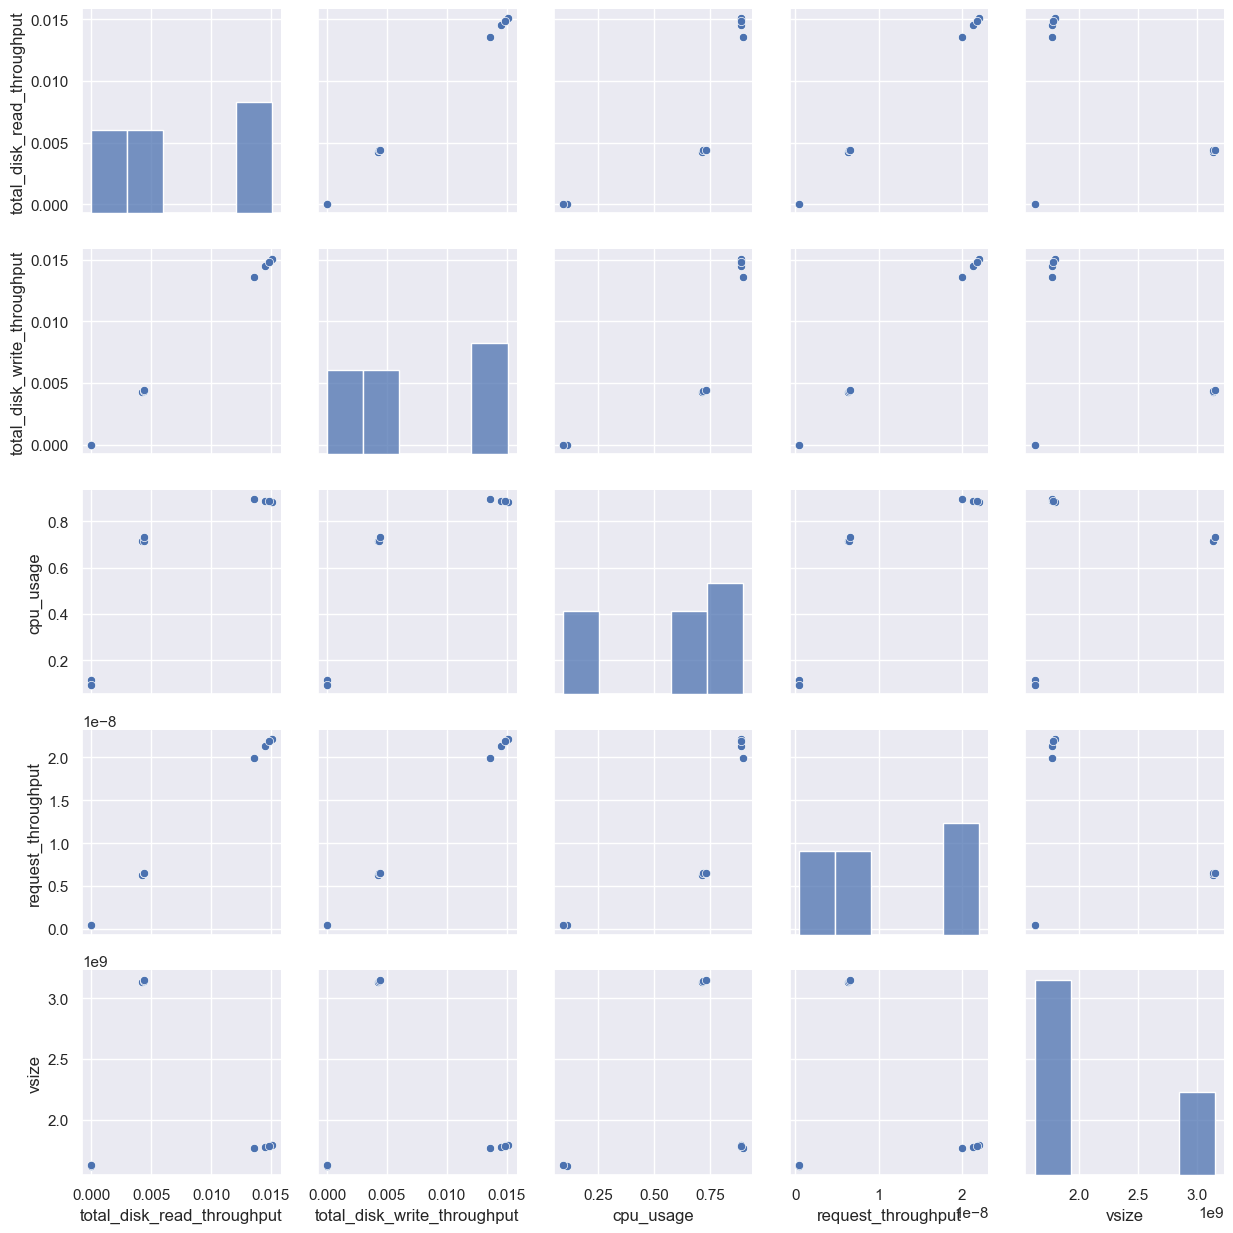

In [7]:
# Rather than visualising pairplots for each machine, try to visualise the pairplots for mean of machines
df = pd.read_csv('initial_eda/5_selected_columns_for_10_machines.csv')
sns.set(font_scale=1)
sns.pairplot(df)